In [ ]:
# Binary Logistic Regression (Attack vs. Normal)
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_csv("../data/UNSW_NB15_training-set.csv")
print("Shape:", df.shape)
df.head()

# Drop useless columns
drop_cols = ['id', 'srcip', 'sport', 'dstip', 'dsport', 'label']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])
print("Remaining columns:", df.columns.tolist())

# Handle categorical features
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features (X) and binary target (y)
X = df.drop(columns=['attack_cat'])
binary_y = (df['attack_cat'] != 'Normal').astype(int)

# Train/test split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, binary_y, test_size=0.2, random_state=42, stratify=binary_y
)

# Scale features
scaler_bin = StandardScaler()
X_train_bin = scaler_bin.fit_transform(X_train_bin)
X_test_bin = scaler_bin.transform(X_test_bin)

# Train binary logistic regression
clf_bin = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_bin.fit(X_train_bin, y_train_bin)

# Predict and evaluate
y_pred_bin = clf_bin.predict(X_test_bin)
print("\nBinary Logistic Regression Results (Attack vs. Normal):")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print(classification_report(y_test_bin, y_pred_bin))

Shape: (82332, 45)
Remaining columns: ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']

Binary Logistic Regression Results (Attack vs. Normal):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7400
           1       0.90      0.92      0.91      9067

    accuracy                           0.90     16467
   macro avg       0.90      0.90      0.90     16467
weighted avg       0.90      0.90      0.90     16467


Binary Logistic Regression Results (Attack vs. Normal):
              preci

In [4]:
# Multiclass Logistic Regression (after binary cell)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['attack_cat'])
y = df['attack_cat']

# Encode target labels (multi-class)
y = LabelEncoder().fit_transform(y)
print("Classes in attack_cat:", np.unique(y))

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Classifier (Logistic Regression)
print("Training Logistic Regression...")
clf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classes in attack_cat: [0 1 2 3 4 5 6 7 8 9]
Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8012995688346389
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.00      0.00      0.00       117
           2       0.45      0.33      0.38       818
           3       0.64      0.56      0.60      2227
           4       0.63      0.43      0.51      1212
           5       0.94      0.97      0.95      3774
           6       0.85      0.96      0.90      7400
           7       0.50      0.63      0.56       699
           8       0.00      0.00      0.00        76
           9       0.00      0.00      0.00         9

    accuracy                           0.80     16467
   macro avg       0.40      0.39      0.39     16467
weighted avg       0.77      0.80      0.78     16467


Logistic Regression Results:
Accuracy: 0.8012995688346389
              precision    recall  f1-score   

d:\Projects\network-intrusion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Projects\network-intrusion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Projects\network-intrusion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

MLP Classifier Results:
Accuracy: 0.8672496508167851
              precision    recall  f1-score   support

           0       0.90      0.07      0.12       135
           1       0.00      0.00      0.00       117
           2       0.44      0.57      0.50       818
           3       0.64      0.75      0.69      2227
           4       0.84      0.59      0.69      1212
           5       0.99      0.98      0.98      3774
           6       0.95      0.98      0.96      7400
           7       0.83      0.72      0.77       699
           8       0.67      0.18      0.29        76
           9       0.00      0.00      0.00         9

    accuracy                           0.87     16467
   macro avg       0.63      0.48      0.50     16467
weighted avg       0.87      0.87      0.86     16467



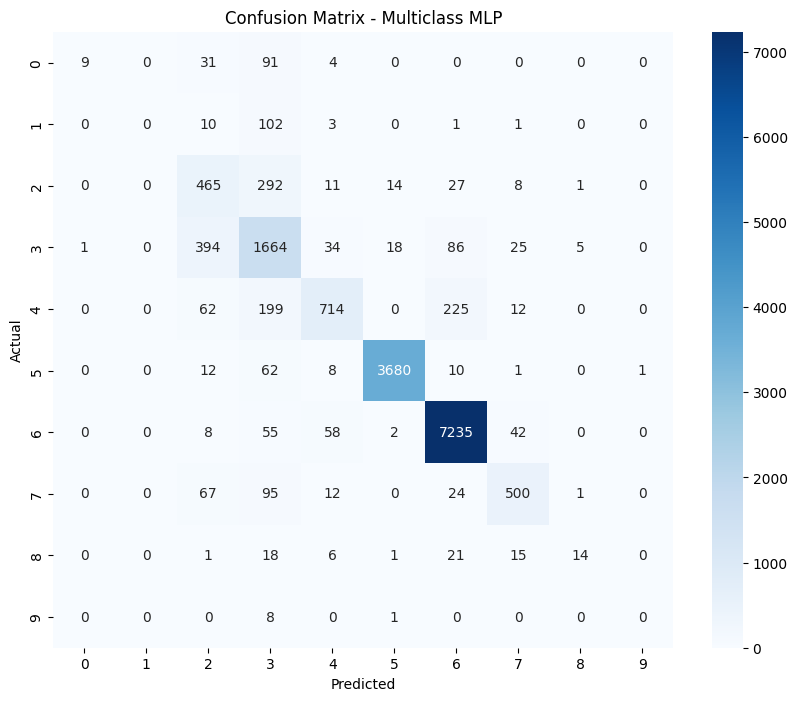

In [5]:
#Multi level perceptron (Shallow Neural Network)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLP model for multiclass
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32, 16),  # 4 hidden layers
    max_iter=200,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True
)

# Train
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred = mlp.predict(X_test_scaled)

# Evaluate
print("MLP Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multiclass MLP")
plt.show()

XGBoost Classifier Results:
Accuracy: 0.873018764802332
              precision    recall  f1-score   support

           0       0.67      0.07      0.13       135
           1       0.14      0.02      0.03       117
           2       0.41      0.40      0.41       818
           3       0.65      0.72      0.69      2227
           4       0.70      0.69      0.70      1212
           5       0.99      0.98      0.99      3774
           6       0.96      0.99      0.98      7400
           7       0.91      0.78      0.84       699
           8       0.51      0.38      0.44        76
           9       1.00      0.33      0.50         9

    accuracy                           0.87     16467
   macro avg       0.69      0.54      0.57     16467
weighted avg       0.87      0.87      0.87     16467



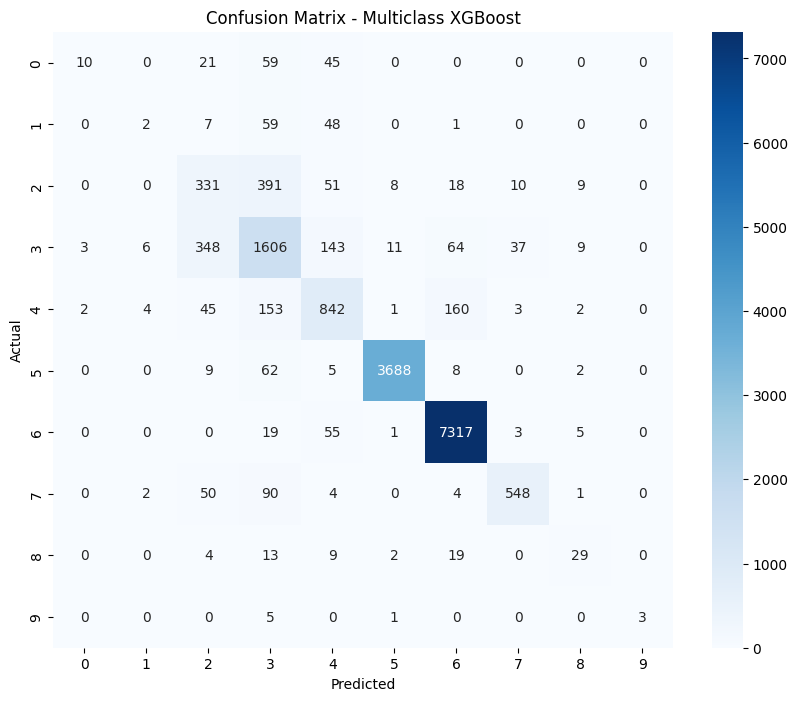

In [3]:
# ===============================
# XGBoost Classifier (Multiclass)
# ===============================
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("../data/UNSW_NB15_training-set.csv")
drop_cols = ['id', 'srcip', 'sport', 'dstip', 'dsport', 'label']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['attack_cat'])
y = df['attack_cat']
y = LabelEncoder().fit_transform(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',   # multiclass classification
    num_class=len(np.unique(y)), # number of classes
    eval_metric='mlogloss',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multiclass XGBoost")
plt.show()